# <font color='#d50283'>IT Academy - Data Science Itinerary</font>
## Sprint 8 Task 1 - Hypothesis Testing
### Assignment by: Kat Weissman

#### Python Learning Objectives:
- Calculate the p-value of different variables or set of variables
- Interpret the p-value and say if it rejects the null hypothesis

*Recommended learning resources:*
- https://towardsdatascience.com/hypothesis-testing-explained-as-simply-as-possible-6e0a256293cf
- https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/
- https://www.scribbr.com/statistics/hypothesis-testing/
- https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/
- https://online.stat.psu.edu/statprogram/reviews/statistical-concepts/hypothesis-testing/p-value-approach
- https://online.stat.psu.edu/statprogram/reviews/statistical-concepts/hypothesis-testing/examples


In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Level 1

### Exercise 1 
Grab a sports theme dataset you like and select an attribute from the dataset. Calculate the p-value and say if you reject the null hypothesis by taking a 5% alpha.

I am using the data that I prepared in Sprint 7:
- IFSC Sport Climbing - Speed Competition Results in 2018 and 2019

Original Data taken from https://www.kaggle.com/brkurzawa/ifsc-sport-climbing-competition-results?rvi=1

#### Data Exploration

In [2]:
data_link = 'https://raw.githubusercontent.com/KatBCN/Hypothesis-Testing/main/IFSC_Speed_Clean.csv'
df = pd.read_csv(data_link)

In [3]:
df.shape

(11868, 30)

As I was preparing data for hypothesis testing, I discovered that there were duplicates in the data set. So, I will remove them before continuing with the hypothesis tests, and re-run all tests.

In [4]:
df.drop_duplicates(inplace = True)

In [5]:
#Show number of rows and columns in dataframe
df.shape

(4025, 30)

In [6]:
#Show column names
df.columns

Index(['Competition Title', 'Competition Date', 'FIRST', 'LAST', 'Nation',
       'StartNr', 'Rank', 'Quali_fall', 'Quali_FS', 'Qualification',
       '1/8_fall', '1/8_FS', '1/8_WC', '1/8 - Final', '1/4_fall', '1/4_FS',
       '1/4_WC', '1/4 - Final', '1/2_fall', '1/2_FS', '1/2_WC', '1/2 - Final',
       'Small_fall', 'Small_FS', 'Small_WC', 'Small final', 'Final_fall',
       'Final_FS', 'Final', 'Category'],
      dtype='object')

In [7]:
#Display first 10 rows of dataframe
df.head(10)

,Competition Title,Competition Date,FIRST,LAST,Nation,StartNr,Rank,Quali_fall,Quali_FS,Qualification,...,1/2_WC,1/2 - Final,Small_fall,Small_FS,Small_WC,Small final,Final_fall,Final_FS,Final,Category
0,"European Youth Championships (L,S) - Voronezh ...",18 - 20 Oktober 2019,Anna,CALANCA,ITA,114,1,0,0,8.686,...,0,9.442,0,0,0,NaN,0,0,8.661,speed
1,"European Youth Championships (L,S) - Voronezh ...",18 - 20 Oktober 2019,Capucine,VIGLIONE,FRA,67,2,0,0,8.612,...,0,8.605,0,0,0,NaN,0,0,10.175,speed
2,"European Youth Championships (L,S) - Voronezh ...",18 - 20 Oktober 2019,Lison,GAUTRON,FRA,66,3,0,0,8.977,...,0,13.409,0,0,0,8.886,0,0,NaN,speed
3,"European Youth Championships (L,S) - Voronezh ...",18 - 20 Oktober 2019,Polina,KULAGINA,RUS,159,4,0,0,8.872,...,0,9.249,0,0,0,9.302,0,0,NaN,speed
4,"European Youth Championships (L,S) - Voronezh ...",18 - 20 Oktober 2019,Kamilla,KUSHAEVA,RUS,160,5,0,0,8.871,...,0,NaN,0,0,0,NaN,0,0,NaN,speed
5,"European Youth Championships (L,S) - Voronezh ...",18 - 20 Oktober 2019,Giulia,RANDI,ITA,116,6,0,0,9.047,...,0,NaN,0,0,0,NaN,0,0,NaN,speed
6,"European Youth Championships (L,S) - Voronezh ...",18 - 20 Oktober 2019,Iana,GULSTEN,RUS,158,7,0,0,9.156,...,0,NaN,0,0,0,NaN,0,0,NaN,speed
7,"European Youth Championships (L,S) - Voronezh ...",18 - 20 Oktober 2019,Franziska,RITTER,GER,89,8,0,0,8.901,...,0,NaN,0,0,0,NaN,0,0,NaN,speed
8,"European Youth Championships (L,S) - Voronezh ...",18 - 20 Oktober 2019,Iuliia,OVCHINNIKOVA,RUS,161,9,0,0,9.166,...,0,NaN,0,0,0,NaN,0,0,NaN,speed
9,"European Youth Championships (L,S) - Voronezh ...",18 - 20 Oktober 2019,Erica,VELEV,BUL,18,10,0,0,9.403,...,0,NaN,0,0,0,NaN,0,0,NaN,speed


In [8]:
#Display last 10 rows of dataframe
df.tail(10)

,Competition Title,Competition Date,FIRST,LAST,Nation,StartNr,Rank,Quali_fall,Quali_FS,Qualification,...,1/2_WC,1/2 - Final,Small_fall,Small_FS,Small_WC,Small final,Final_fall,Final_FS,Final,Category
4015,"European Youth Cup (L,S) - Voiron (FRA) 2018",7 - 8 April 2018,Adrien,LEMAIRE,FRA,83,5,0,0,7.68,...,0,NaN,0,0,0,NaN,0,0,NaN,speed
4016,"European Youth Cup (L,S) - Voiron (FRA) 2018",7 - 8 April 2018,Cristian,DORIGATTI,ITA,84,6,0,0,6.74,...,0,NaN,0,0,0,NaN,0,0,NaN,speed
4017,"European Youth Cup (L,S) - Voiron (FRA) 2018",7 - 8 April 2018,Yann,LE CLERCQ DE LANNOY,FRA,85,7,0,0,7.45,...,0,NaN,0,0,0,NaN,0,0,NaN,speed
4018,"European Youth Cup (L,S) - Voiron (FRA) 2018",7 - 8 April 2018,Mikel Asier,LINACISORO MOLINA,ESP,92,8,0,0,8.51,...,0,NaN,0,0,0,NaN,0,0,NaN,speed
4019,"European Youth Cup (L,S) - Voiron (FRA) 2018",7 - 8 April 2018,Petar,IVANOV,BUL,90,9,0,0,9.04,...,0,NaN,0,0,0,NaN,0,0,NaN,speed
4020,"European Youth Cup (L,S) - Voiron (FRA) 2018",7 - 8 April 2018,Mykhayil,TKACHUK,UKR,87,10,0,0,9.78,...,0,NaN,0,0,0,NaN,0,0,NaN,speed
4021,"European Youth Cup (L,S) - Voiron (FRA) 2018",7 - 8 April 2018,Guillem,MONSECH GASCA,ESP,93,11,0,0,10.23,...,0,NaN,0,0,0,NaN,0,0,NaN,speed
4022,"European Youth Cup (L,S) - Voiron (FRA) 2018",7 - 8 April 2018,Kristóf,TÓTH,HUN,86,12,0,0,10.27,...,0,NaN,0,0,0,NaN,0,0,NaN,speed
4023,"European Youth Cup (L,S) - Voiron (FRA) 2018",7 - 8 April 2018,Jorge,DÍAZ-RULLO CALVO,ESP,89,13,0,0,11.91,...,0,NaN,0,0,0,NaN,0,0,NaN,speed
4024,"European Youth Cup (L,S) - Voiron (FRA) 2018",7 - 8 April 2018,Mathis,BROSSIER,FRA,81,14,0,0,12.60,...,0,NaN,0,0,0,NaN,0,0,NaN,speed


In [9]:
#Checking dataset variables
df.dtypes

Competition Title     object
Competition Date      object
FIRST                 object
LAST                  object
Nation                object
StartNr                int64
Rank                   int64
Quali_fall             int64
Quali_FS               int64
Qualification        float64
1/8_fall               int64
1/8_FS                 int64
1/8_WC                 int64
1/8 - Final          float64
1/4_fall               int64
1/4_FS                 int64
1/4_WC                 int64
1/4 - Final          float64
1/2_fall               int64
1/2_FS                 int64
1/2_WC                 int64
1/2 - Final          float64
Small_fall             int64
Small_FS               int64
Small_WC               int64
Small final          float64
Final_fall             int64
Final_FS               int64
Final                float64
Category              object
dtype: object

In [10]:
#View summary statistics of each variable.
def mySummary(df):
    for v in df.columns:
            print ("\n" + v)
            print(df[v].describe())
            print ()

mySummary(df)


Competition Title
count                                                  4025
unique                                                   30
top       IFSC Youth World Championships -  Arco (ITA) 2...
freq                                                    342
Name: Competition Title, dtype: object


Competition Date
count                     4025
unique                      29
top       22  - 31 August 2019
freq                       342
Name: Competition Date, dtype: object


FIRST
count      4025
unique      997
top       Elena
freq         43
Name: FIRST, dtype: object


LAST
count     4025
unique    1089
top        KIM
freq        38
Name: LAST, dtype: object


Nation
count     4025
unique      62
top        RUS
freq       405
Name: Nation, dtype: object


StartNr
count    4025.000000
mean      163.512547
std       142.576720
min         1.000000
25%        54.000000
50%       127.000000
75%       232.000000
max       797.000000
Name: StartNr, dtype: float64


Rank
count    4025.000

### Shapiro-Wilk Normality Test
- Reference: https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test

I will use the Shapiro-Wilk test to determine if the Qualification race times have a normal distribution for the competition with the most competitors: IFSC Youth World Championships in Arco, Italy in 2019.

In [11]:
topCompetition = stats.mode(df['Competition Title'])[0][0]
print(topCompetition)

IFSC Youth World Championships -  Arco (ITA) 2019 


In [12]:
topCompDf = df[df["Competition Title"] == topCompetition]
topCompDf.describe()

,StartNr,Rank,Quali_fall,Quali_FS,Qualification,1/8_fall,1/8_FS,1/8_WC,1/8 - Final,1/4_fall,...,1/2_FS,1/2_WC,1/2 - Final,Small_fall,Small_FS,Small_WC,Small final,Final_fall,Final_FS,Final
count,342.000000,342.000000,342.000000,342.000000,336.000000,342.000000,342.0,342.0,92.000000,342.000000,...,342.0,342.0,22.000000,342.000000,342.0,342.0,10.000000,342.000000,342.0,11.000000
mean,373.289474,29.809942,0.005848,0.011696,10.680119,0.011696,0.0,0.0,8.710935,0.008772,...,0.0,0.0,8.411091,0.005848,0.0,0.0,8.623000,0.002924,0.0,7.547636
std,216.048167,17.661915,0.076360,0.107671,3.672676,0.107671,0.0,0.0,1.585473,0.093384,...,0.0,0.0,1.468345,0.076360,0.0,0.0,1.462401,0.054074,0.0,1.196696
min,1.000000,1.000000,0.000000,0.000000,5.717000,0.000000,0.0,0.0,6.040000,0.000000,...,0.0,0.0,5.871000,0.000000,0.0,0.0,5.979000,0.000000,0.0,5.835000
25%,186.500000,15.000000,0.000000,0.000000,8.058000,0.000000,0.0,0.0,7.179500,0.000000,...,0.0,0.0,7.544500,0.000000,0.0,0.0,7.537500,0.000000,0.0,6.640500
50%,364.500000,29.000000,0.000000,0.000000,9.771000,0.000000,0.0,0.0,8.784500,0.000000,...,0.0,0.0,8.829500,0.000000,0.0,0.0,8.864500,0.000000,0.0,8.044000
75%,573.750000,44.000000,0.000000,0.000000,12.422750,0.000000,0.0,0.0,9.992000,0.000000,...,0.0,0.0,9.190250,0.000000,0.0,0.0,9.498250,0.000000,0.0,8.567000
max,797.000000,66.000000,1.000000,1.000000,30.413000,1.000000,0.0,0.0,12.907000,1.000000,...,0.0,0.0,11.603000,1.000000,0.0,0.0,10.647000,1.000000,0.0,9.104000


In [13]:
# Shapiro-Wilk Normality Test
from scipy.stats import shapiro
data = topCompDf["Qualification"].dropna() #NAs cannot be included in the test.
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
        print('Probably Gaussian')
else:
        print('Probably not Gaussian')

stat=0.877, p=0.000
Probably not Gaussian


In [14]:
data.describe()

count    336.000000
mean      10.680119
std        3.672676
min        5.717000
25%        8.058000
50%        9.771000
75%       12.422750
max       30.413000
Name: Qualification, dtype: float64

Text(0.5, 1.0, 'Histogram of Qualification Speed Times (Arco, 2019)')

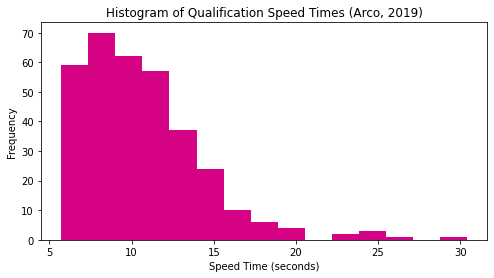

In [15]:
fig = plt.figure(figsize=(8,4))
plt.hist(data,color='#d50283', bins=15)
plt.xlabel('Speed Time (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Qualification Speed Times (Arco, 2019)')

The Shapiro-Wilk test determines that the data is not Normally distributed, and the histogram also does not appear to be normally distributed. 

### Level 2
### Exercise 2
Continue with the sports theme dataset you like and select two other attributes from the dataset. Calculate the p-values and say if they reject the null hypothesis by taking a 5% alpha.

### Anderson-Darling Normality Test
- Reference: https://en.wikipedia.org/wiki/Anderson%E2%80%93Darling_test

Next, I will try to to test the normality of the average qualification time per nation in the same competition using the Anderson Darling Normality Test

In [16]:
topCompByNation = topCompDf.groupby("Nation")
dataByNation = topCompByNation["Qualification"].mean()

In [17]:
#Anderson-Darling Normality Test
from scipy.stats import anderson
result = anderson(dataByNation)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < cv:
                print('Probably Gaussian at the %.1f%% level' % (sl))
        else:
                print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=0.907
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


Text(0.5, 1.0, 'Histogram of Average Qualification Speed Times by Nation (Arco, 2019)')

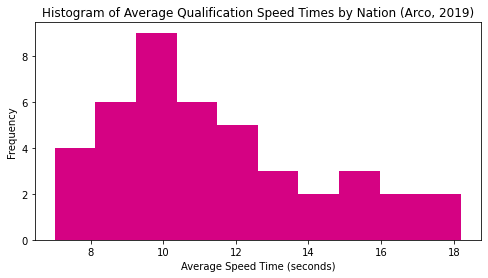

In [18]:
fig = plt.figure(figsize=(8,4))
plt.hist(dataByNation,color='#d50283')
plt.xlabel('Average Speed Time (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Average Qualification Speed Times by Nation (Arco, 2019)')

The Anderson-Darling test determines that the average qualification speed time by nation is also not Normally distributed at the 5% level, and the histogram also does not appear to be normally distributed.

Next, I would like to compare the athletes who most frequently appear in 1/4 Finals in all the competitions

In [19]:
#get index of which rows have a valid 1/4 final time recorded
quarterFinals_index = df["1/4 - Final"].dropna().keys()

In [20]:
quarterFinalsDf = df.loc[quarterFinals_index]

In [21]:
mySummary(quarterFinalsDf)


Competition Title
count                                                   711
unique                                                   30
top       IFSC Youth World Championships -  Moscow (RUS)...
freq                                                     46
Name: Competition Title, dtype: object


Competition Date
count                   711
unique                   29
top       12  - 13 May 2018
freq                     52
Name: Competition Date, dtype: object


FIRST
count      711
unique     248
top       Anna
freq        22
Name: FIRST, dtype: object


LAST
count         711
unique        263
top       KALUCKA
freq           21
Name: LAST, dtype: object


Nation
count     711
unique     28
top       RUS
freq      145
Name: Nation, dtype: object


StartNr
count    711.000000
mean     156.784810
std      154.704635
min        1.000000
25%       44.000000
50%      111.000000
75%      207.000000
max      796.000000
Name: StartNr, dtype: float64


Rank
count    711.000000
mean       4.

A unique identifier for each athlete should be first name, last name, and nation. So I will combine these attributes into a single column to group by.

In [22]:
quarterFinalsDf['identifier'] = quarterFinalsDf['FIRST'] + ' ' + quarterFinalsDf['LAST'] + ' ' + quarterFinalsDf['Nation']

In [23]:
topQuarterFinalists = pd.DataFrame((quarterFinalsDf['identifier'].value_counts()))
topQuarterFinalists.head()

,identifier
Anouck JAUBERT FRA,13
Aleksandra KALUCKA POL,12
Mariia KRASAVINA RUS,11
Reza ALIPOURSHENAZANDIFAR IRI,10
Aries SUSANTI RAHAYU INA,10


In [24]:
top2Finalists = [topQuarterFinalists.iloc[0].name, topQuarterFinalists.iloc[1].name]
top2Finalists

['Anouck JAUBERT FRA', 'Aleksandra KALUCKA POL']

The athletes appearing most frequently in Quarter Finals are Anouk Jaubert from France and Aleksandra Kalucka from Poland.

In [25]:
top2QuarterFinalistsDf = quarterFinalsDf[quarterFinalsDf.identifier.isin(top2Finalists)].copy()
mySummary(top2QuarterFinalistsDf[["Competition Title", "identifier", "1/4 - Final"]])


Competition Title
count                                                    25
unique                                                   21
top       European Championship (L,S) - Edinburgh (GBR) ...
freq                                                      2
Name: Competition Title, dtype: object


identifier
count                     25
unique                     2
top       Anouck JAUBERT FRA
freq                      13
Name: identifier, dtype: object


1/4 - Final
count    25.00000
mean      8.13848
std       0.64029
min       7.40000
25%       7.68700
50%       7.93000
75%       8.38000
max       9.68400
Name: 1/4 - Final, dtype: float64



### Nonparametric Statistical Hypothesis Test
### Mann-Whitney U Test

- Reference: https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test

In [26]:
#Selecting quarter final results from each athlete
data1 = quarterFinalsDf[quarterFinalsDf.identifier == (top2Finalists[0])]['1/4 - Final']
data2 = quarterFinalsDf[quarterFinalsDf.identifier == (top2Finalists[1])]['1/4 - Final']

In [27]:
#Mann-Whitney U Test
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
        print('Probably the same distribution')
else:
        print('Probably different distributions')

stat=41.000, p=0.047
Probably different distributions


The Mann-Whitney U Test has determined that the quarter final speed times of the two athletes that most frequently appear in quarter finals come from different distributions at a borderline p-value of 0.047, which is close to 0.05. If we had more data available, it is possible that we could acheive a more definitive p-value.

<bound method Figure.show of <Figure size 576x288 with 1 Axes>>

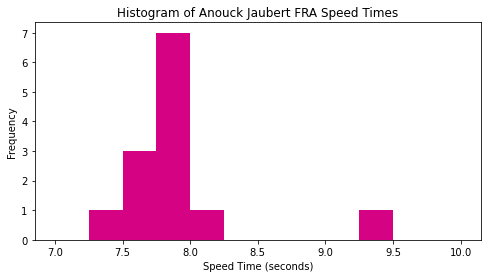

In [28]:
fig = plt.figure(figsize=(8,4))
plt.hist(data1,color='#d50283',bins=12,range=(7,10))
plt.xlabel('Speed Time (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Anouck Jaubert FRA Speed Times')
fig.show

<bound method Figure.show of <Figure size 576x288 with 1 Axes>>

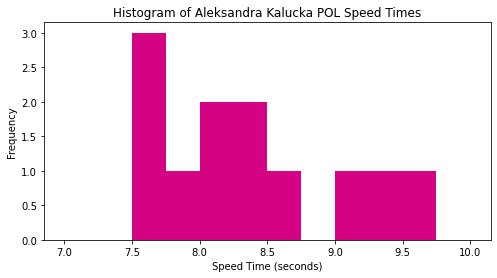

In [29]:
fig = plt.figure(figsize=(8,4))
plt.hist(data2,color='#d50283',bins=12,range=(7,10))
plt.xlabel('Speed Time (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Aleksandra Kalucka POL Speed Times')
fig.show

After plotting the histograms of both athlete's quarter final speed results, we can see that Anouck Jaubert of France has consistently faster times in the quarter finals round than Aleksandra Kalucka of Poland, with most of her results below 8 seconds.

### Level 3
### Exercise 3
Continue with the sports theme dataset you like and select three attributes from the dataset. Calculate the p-value and say if you reject the null hypothesis by taking a 5% alpha.

Next, I will compare the qualification time distributions of the two countires who most frequently appear in quarter finals.

In [30]:
quarterFinalsDf['Nation'].value_counts()

RUS    145
ITA    126
FRA    101
POL     58
UKR     50
CHN     42
INA     41
USA     22
GER     20
KOR     19
IRI     14
KAZ     13
AUT     12
CZE     11
ECU     10
THA      4
SLO      3
SGP      3
KGZ      3
JPN      3
IND      2
CHI      2
HKG      2
CAN      1
ARG      1
VEN      1
BUL      1
ESP      1
Name: Nation, dtype: int64

Russia and Italy appear most frequently in the quarter finals.

In [31]:
QualiTimesRUS = df[df["Nation"] == 'RUS']['Qualification'].dropna()
QualiTimesITA = df[df["Nation"] == 'ITA']['Qualification'].dropna()

In [32]:
QualiTimesRUS.describe()

count    396.000000
mean       8.119694
std        1.844281
min        5.542000
25%        6.451000
50%        8.005000
75%        9.160250
max       20.490000
Name: Qualification, dtype: float64

In [33]:
QualiTimesITA.describe()

count    331.000000
mean       8.701704
std        1.738336
min        5.910000
25%        7.139500
50%        8.730000
75%       10.055000
max       13.990000
Name: Qualification, dtype: float64

### Kruskal-Wallis H Test
- Reference: https://en.wikipedia.org/wiki/Kruskal%E2%80%93Wallis_one-way_analysis_of_variance

In [34]:
#Kruskal-Wallis H Test
from scipy.stats import kruskal
stat, p = kruskal(QualiTimesRUS, QualiTimesITA)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
        print('Probably the same distribution')
else:
        print('Probably different distributions')

stat=25.570, p=0.000
Probably different distributions


The Kruskall Wallis H Test has determined that the qualification speed times for Russia and Italy come from different distributions at the 5% level.

<bound method Figure.show of <Figure size 576x288 with 1 Axes>>

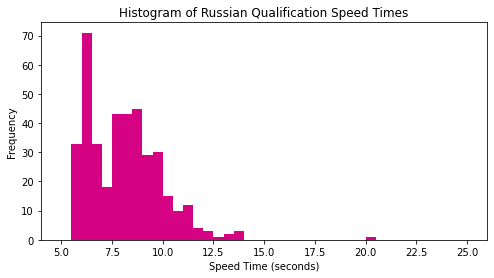

In [35]:
fig = plt.figure(figsize=(8,4))
plt.hist(QualiTimesRUS,color='#d50283', bins=40,range=(5,25) )
plt.xlabel('Speed Time (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Russian Qualification Speed Times')
fig.show

<bound method Figure.show of <Figure size 576x288 with 1 Axes>>

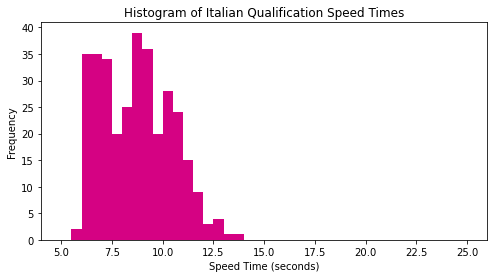

In [36]:
fig = plt.figure(figsize=(8,4))
plt.hist(QualiTimesITA,color='#d50283', bins=40,range=(5,25))
plt.xlabel('Speed Time (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Italian Qualification Speed Times')
fig.show

All of the analysis I have performed appear to show that the times come from different distributions. I suspect the analysis could have different results if the competition results were separated by gender, however it is not a factor that is included in the data. In the cases of comparing countries, there could be a mix of men and women included, and the gender distribution could be unequal.